In [7]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('rotterdam.csv')
df['meno'].value_counts(normalize=True)

meno
1   0.56
0   0.44
Name: proportion, dtype: float64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pid,"2,982.00","1,504.95",868.39,1.00,753.25,"1,504.50","2,254.75","3,007.00"
year,"2,982.00","1,988.16",3.04,"1,978.00","1,986.00","1,988.00","1,990.00","1,993.00"
age,"2,982.00",55.06,12.95,24.00,45.00,54.00,65.00,90.00
hospital_id,"2,982.00",5.96,6.69,0.00,0.00,3.00,10.00,24.00
meno,"2,982.00",0.56,0.50,0.00,0.00,1.00,1.00,1.00
grade,"2,982.00",2.73,0.44,2.00,2.00,3.00,3.00,3.00
nodes,"2,982.00",2.71,4.38,0.00,0.00,1.00,4.00,34.00
pgr,"2,982.00",161.83,291.31,0.00,4.00,41.00,198.00,"5,004.00"
er,"2,982.00",166.59,272.47,0.00,11.00,61.00,202.75,"3,275.00"
hormon,"2,982.00",0.11,0.32,0.00,0.00,0.00,0.00,1.00


In [6]:
df[['meno', 'chemo']].value_counts(normalize=True)

meno  chemo
1     0       0.53
0     0       0.28
      1       0.16
1     1       0.03
Name: proportion, dtype: float64

In [ ]:
colors = [
    '#baddf5', 
    '#cc2b2b'
]

In [10]:
num_vars = {"year", "age", "nodes", "pgr", "er", "rtime", "dtime"}
cat_vars = {"hospital_id", "meno", "size", "grade", "hormon", "chemo", "recur", "death"}

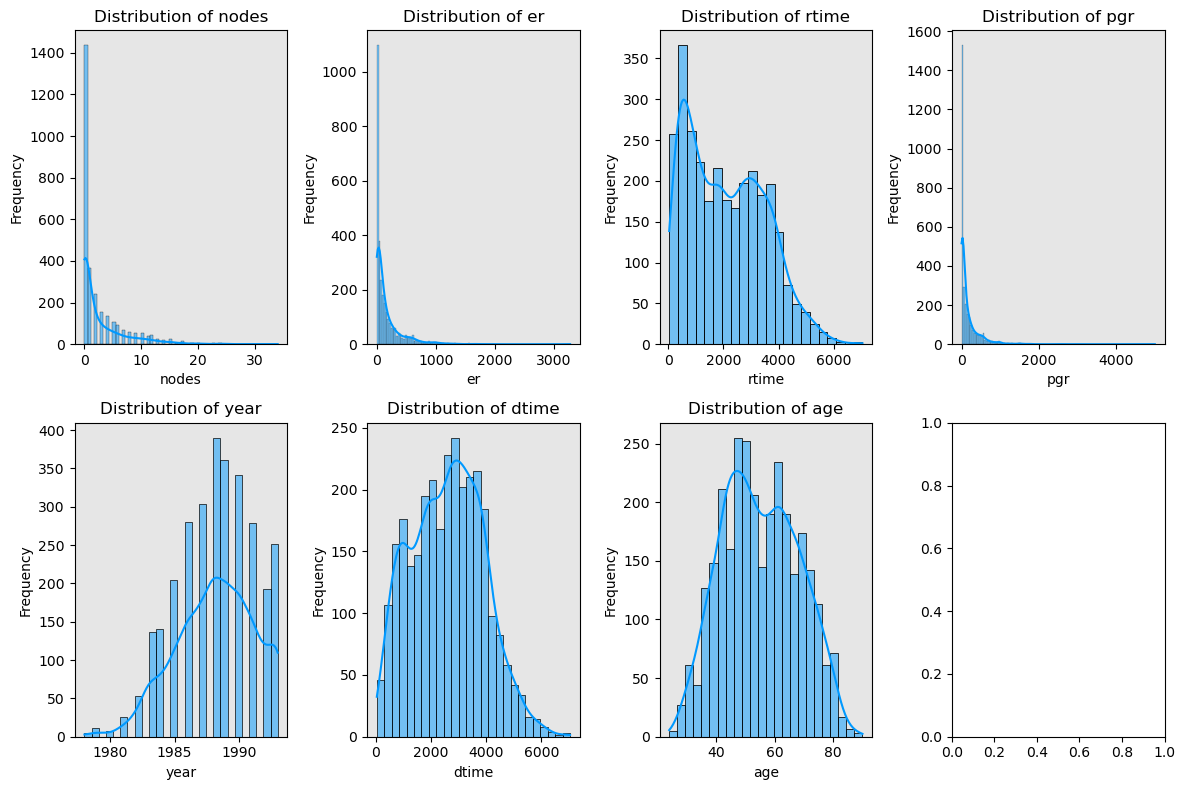

In [18]:
nrows = (len(num_vars) + 3) // 4
ncols = 4
num_vars_list = list(num_vars)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
for i in range(len(num_vars_list)):
    ax = axs[i // ncols, i % ncols]
    sns.histplot(data=df, x=num_vars_list[i], kde=True, color="#0099ff", ax=ax)
    ax.set_title(f'Distribution of {num_vars_list[i]}')
    ax.set_xlabel(num_vars_list[i])
    ax.set_ylabel('Frequency')
    ax.set_facecolor('#e6e6e6')
plt.tight_layout()
plt.show()

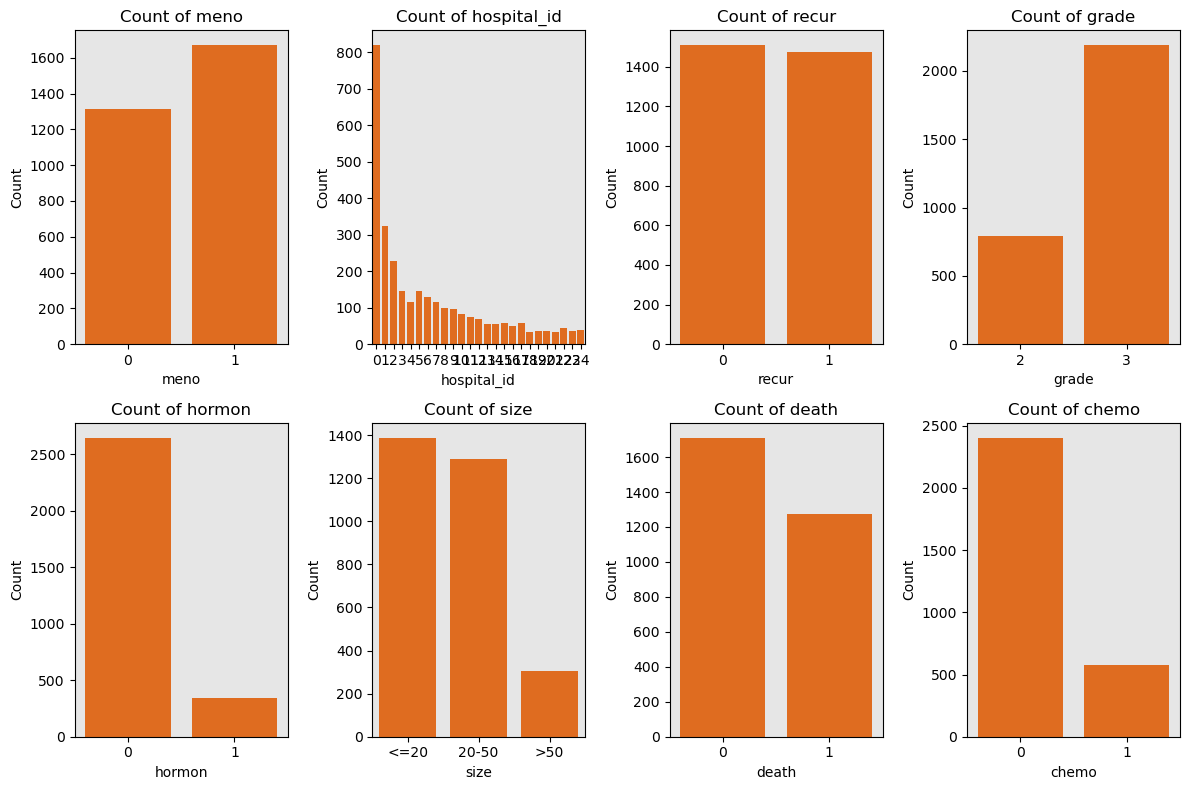

In [13]:
nrows = (len(cat_vars) + 3) // 4
ncols = 4
cat_vars_list = list(cat_vars)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
for i in range(len(cat_vars_list)):
    ax = axs[i // ncols, i % ncols]
    sns.countplot(data=df, x=cat_vars_list[i], color="#ff6600", ax=ax)
    ax.set_title(f'Count of {cat_vars_list[i]}')
    ax.set_xlabel(cat_vars_list[i])
    ax.set_ylabel('Count')
    ax.set_facecolor('#e6e6e6')
plt.tight_layout()
plt.show()

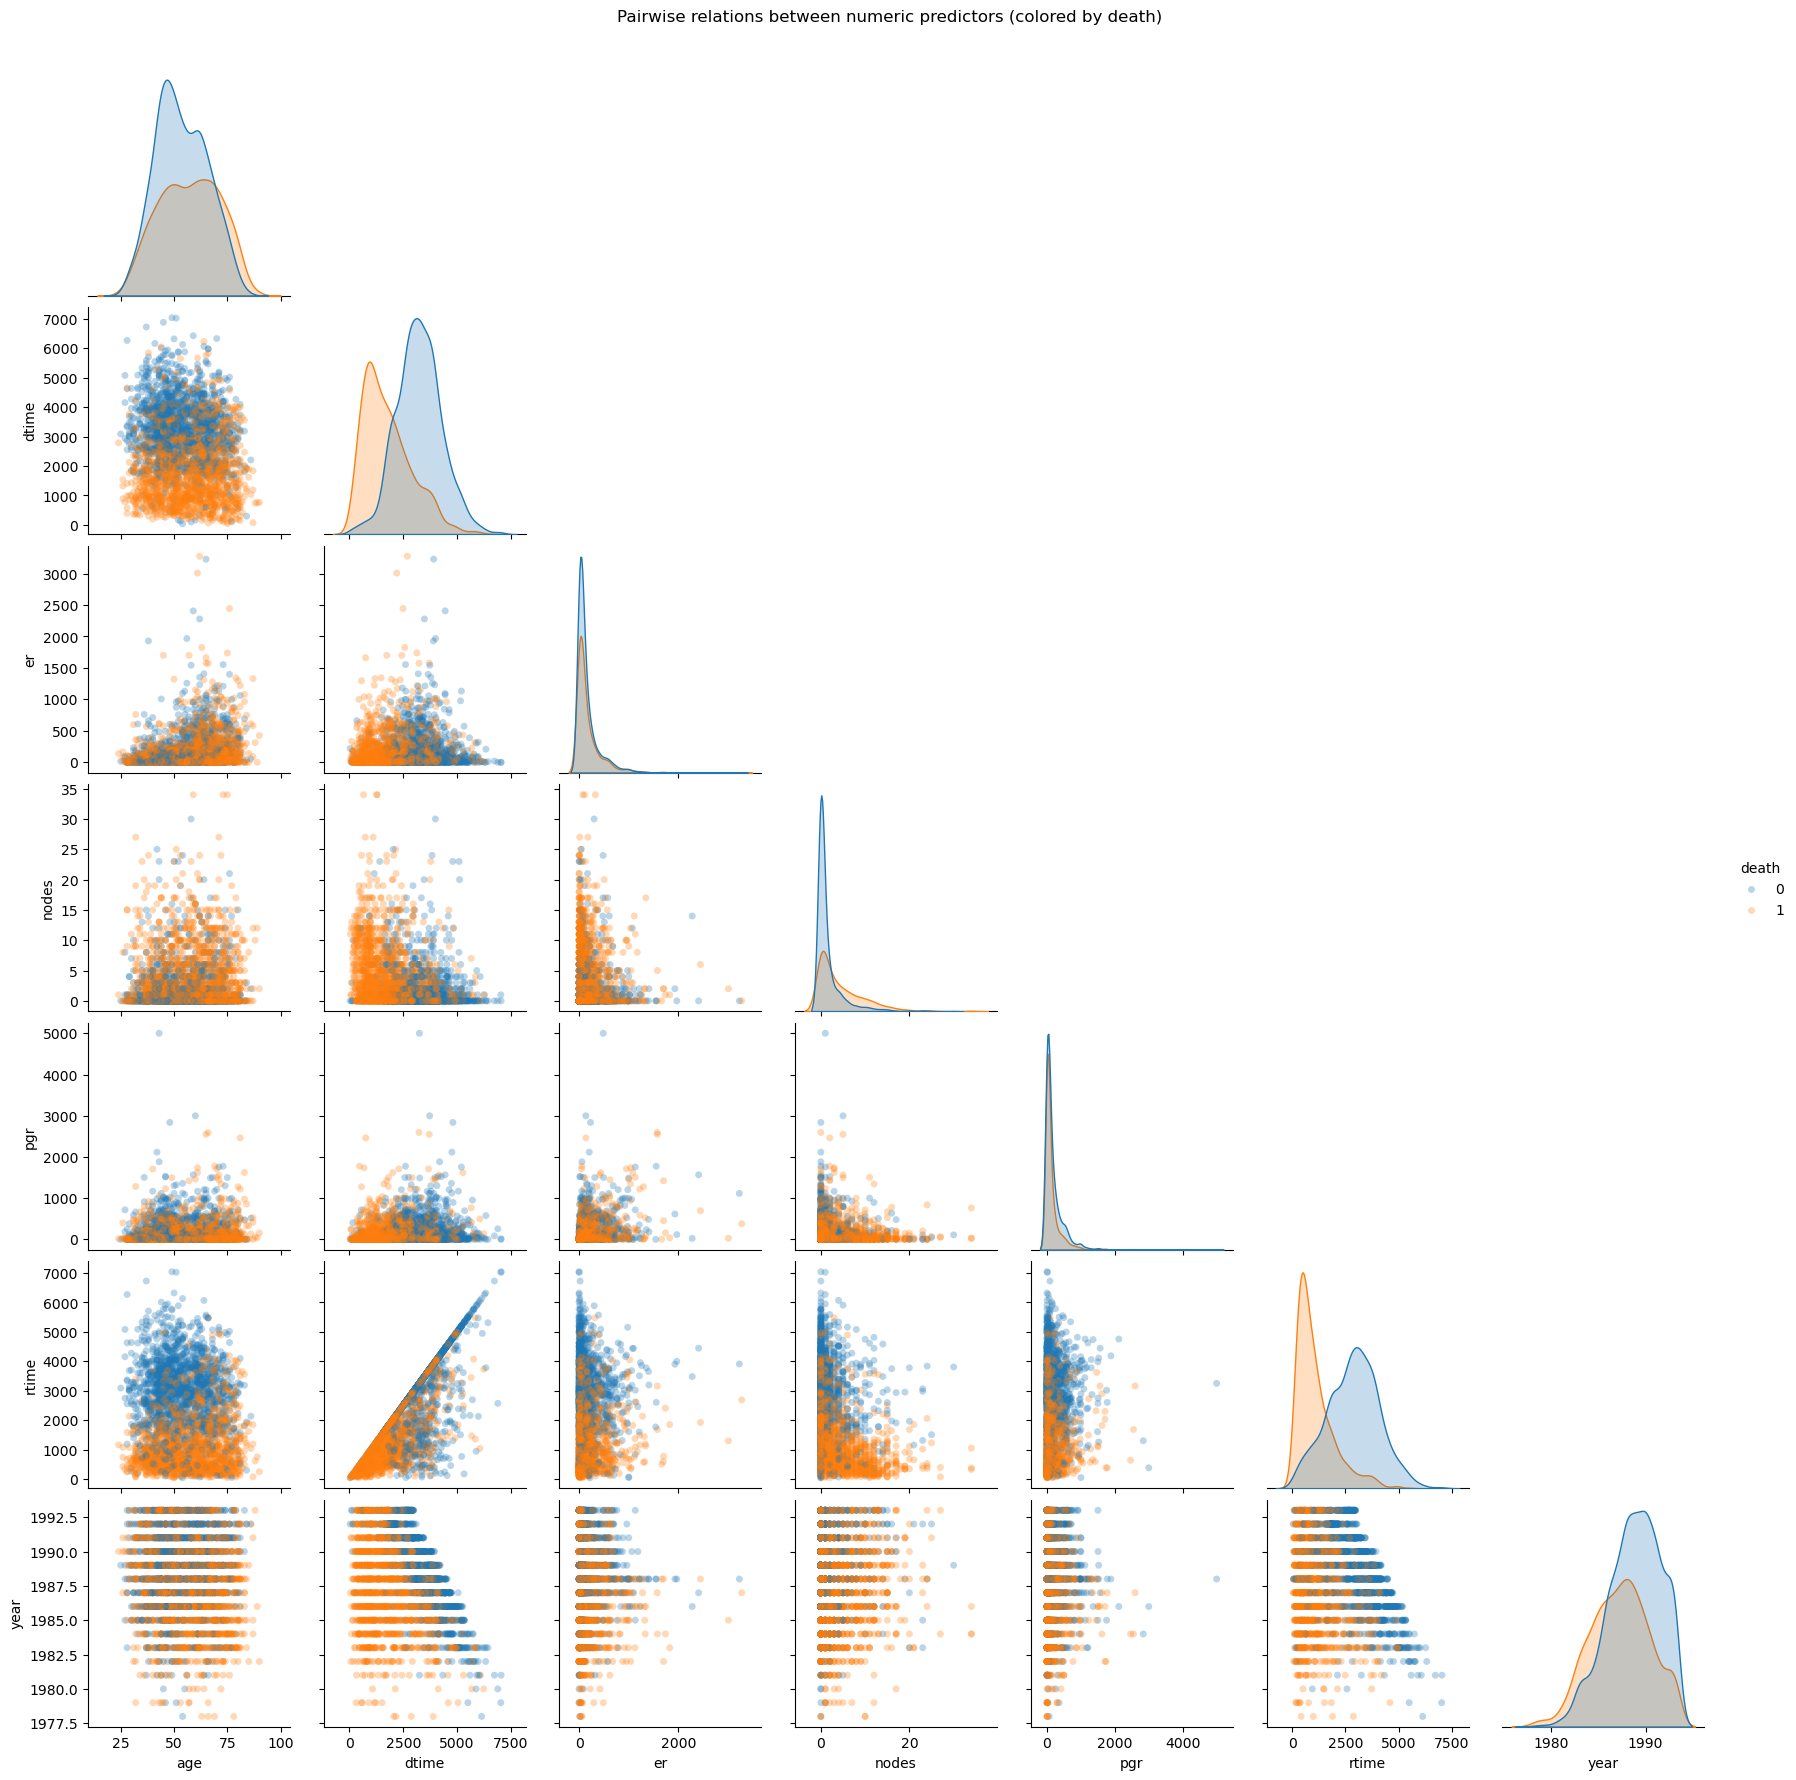

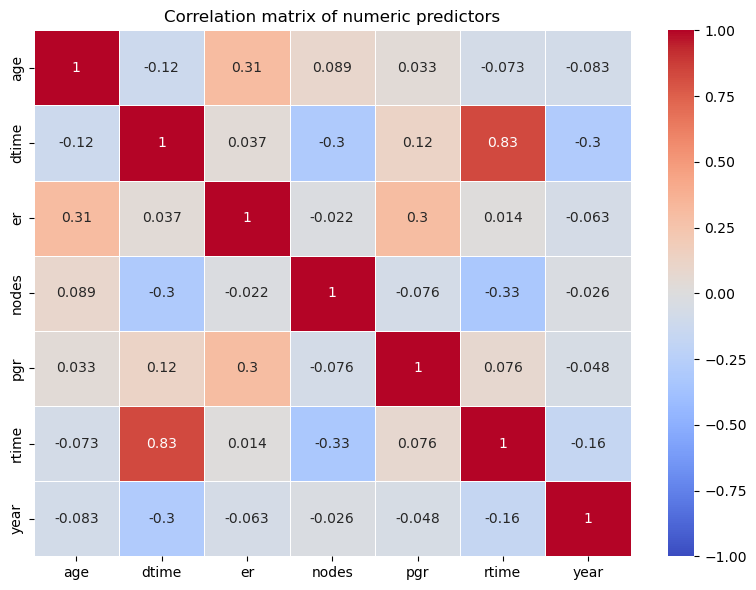

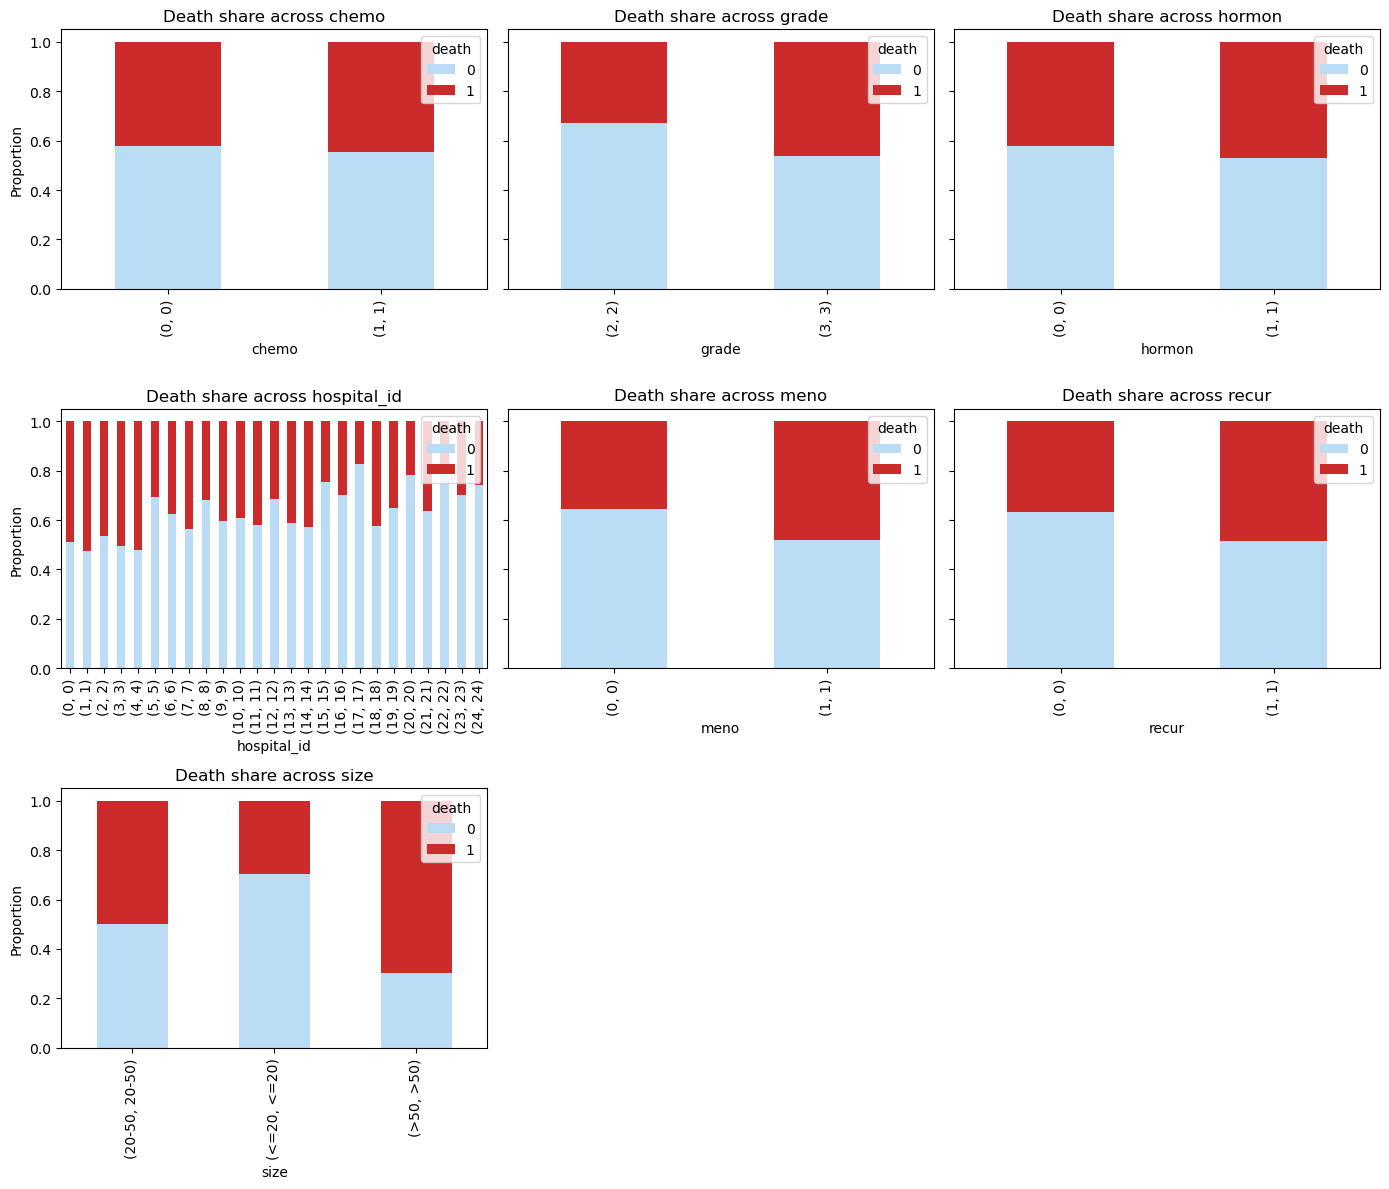

In [22]:
# --- numeric predictors: pairwise relationships + correlation structure ---
num_predictors = sorted(num_vars)
pair_df = df[num_predictors + ['death']].dropna()

sns.pairplot(
    pair_df,
    hue='death',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.3, 's': 25, 'edgecolor': 'none'}
)
plt.suptitle('Pairwise relations between numeric predictors (colored by death)', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
corr = pair_df[num_predictors].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation matrix of numeric predictors')
plt.tight_layout()
plt.show()

# --- categorical predictors: dependency with the outcome ---
cat_predictors = sorted(cat_vars - {'death'})
ncols = 3
nrows = (len(cat_predictors) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows), sharey=True)
axes = axes.flatten()

for ax, col in zip(axes, cat_predictors):
    share = (
        df.groupby([col, 'death'])
          .size()
          .groupby(level=0)
          .apply(lambda x: x / x.sum())
          .unstack(fill_value=0)
          .sort_index()
    )
    share.plot(kind='bar', stacked=True, color=colors, ax=ax)
    ax.set_title(f'Death share across {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    ax.legend(title='death', loc='upper right')

for ax in axes[len(cat_predictors):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [3]:
df['year'].min(), df['year'].max()

(1978, 1993)